In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from skimage.metrics import structural_similarity as ssim

In [8]:
def signed_difference_visual(img1_path, img2_path, amplify=10.0):
    img1 = cv2.imread(img1_path).astype(np.float32) / 255.0
    img2 = cv2.imread(img2_path).astype(np.float32) / 255.0

    # Compute signed difference (mean over RGB)
    diff = (img1 - img2).mean(axis=2)  # (H, W), signed

    # Amplify for visibility
    diff_amplified = diff * amplify
    diff_amplified = np.clip(diff_amplified, -1.0, 1.0)

    # Custom red-green-black colormap (same as before)
    cdict = {
        'red':   ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 1.0, 1.0)),
        'green': ((0.0, 1.0, 1.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0)),
        'blue':  ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0))
    }
    redgreen_black_cmap = LinearSegmentedColormap('RedGreenBlack', cdict)

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.imshow(diff_amplified, cmap=redgreen_black_cmap, vmin=-1.0, vmax=1.0)
    plt.colorbar()
    plt.title(f"Signed RGB Difference Map (Model A - Model B) x{amplify}")
    plt.axis('off')
    plt.show()

In [3]:
def sobel_difference_signed(img1_path, img2_path, amplify=5.0):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

    # Sobel gradients
    sobelx1 = cv2.Sobel(img1, cv2.CV_32F, 1, 0, ksize=3)
    sobely1 = cv2.Sobel(img1, cv2.CV_32F, 0, 1, ksize=3)
    grad1 = np.sqrt(sobelx1**2 + sobely1**2)

    sobelx2 = cv2.Sobel(img2, cv2.CV_32F, 1, 0, ksize=3)
    sobely2 = cv2.Sobel(img2, cv2.CV_32F, 0, 1, ksize=3)
    grad2 = np.sqrt(sobelx2**2 + sobely2**2)

    # Signed difference
    diff = (grad1 - grad2) * amplify
    diff = np.clip(diff, -1.0, 1.0)

    # Custom colormap: green (neg) → black (zero) → red (pos)
    cdict = {
        'red':   ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 1.0, 1.0)),
        'green': ((0.0, 1.0, 1.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0)),
        'blue':  ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0))
    }
    redgreen_black_cmap = LinearSegmentedColormap('RedGreenBlack', cdict)

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.imshow(diff, cmap=redgreen_black_cmap, vmin=-1.0, vmax=1.0)
    plt.colorbar()
    plt.title("Signed Sobel Difference (Red=Model1 stronger, Green=Model2 stronger)")
    plt.axis('off')
    plt.show()

In [4]:
def show_difference_heatmap(img1_path, img2_path):
    img1 = cv2.imread(img1_path).astype(np.float32) / 255.0
    img2 = cv2.imread(img2_path).astype(np.float32) / 255.0

    diff = np.abs(img1 - img2)
    diff_gray = diff.mean(axis=2)  # Average over RGB channels

    plt.figure(figsize=(10, 5))
    plt.imshow(diff_gray, cmap='hot')
    plt.colorbar()
    plt.title("Difference Heatmap (L1 Error)")
    plt.axis('off')
    plt.show()

In [ ]:
def ssim_difference(img1_path, img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    ssim_map, ssim_score = ssim(gray1, gray2, full=True)

    plt.figure(figsize=(10, 5))
    plt.imshow(ssim_map, cmap='viridis')
    plt.colorbar()
    plt.title(f"SSIM Map (Mean SSIM: {ssim_score:.4f})")
    plt.axis('off')
    plt.show()

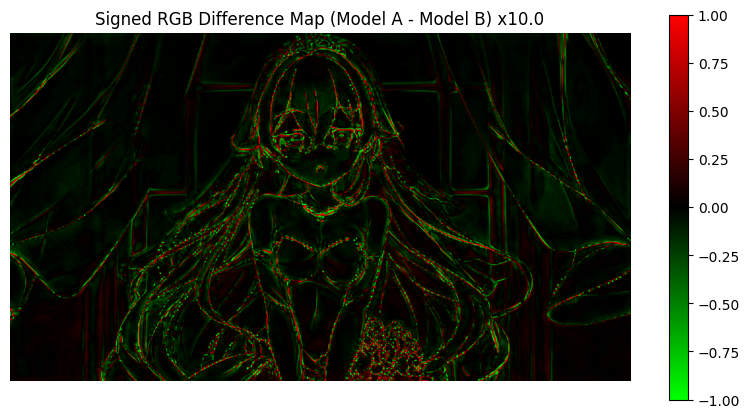

In [11]:
#show_difference_heatmap('normal_20000.jpg', 'binarysobel_5_05_20000.jpg')
signed_difference_visual('../results/img_004649_out.png', '../results\img_004649_45000.png')

#('normal_20000.jpg', 'binarysobel_5_05_20000.jpg')

# sobel_difference_signed('normal_80000.jpg', 'sobel_002_80000.jpg')
#sobel_difference_signed('anime6B.jpg', 'sobel_002_80000.jpg')
#sobel_difference_signed('sobel_002_60000.jpg', 'sobel_002_80000.jpg')